In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\tjjaf\Downloads\StudentsPerformance.csv")

df.shape

In [3]:
df.shape

(1000, 8)

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
print("Categories in 'gender' variable:     ", end="  ")
print (df['gender'].unique())

print("Categories in 'race/ethnicity' variable:     ", end="  ")
print (df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable:     ", end="  ")
print (df['parental level of education'].unique())

print("Categories in 'lunch' variable:     ", end="  ")
print (df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ", end="  ")
print (df['test preparation course'].unique())

Categories in 'gender' variable:       ['female' 'male']
Categories in 'race/ethnicity' variable:       ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:       ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:       ['standard' 'free/reduced']
Categories in 'test preparation course' variable:       ['none' 'completed']


In [12]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

print ('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))

print ('\nWe have {} categorical features : {}'.format(len(categorical_feature), categorical_feature))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [13]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
reading_full = df[df['reading score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()


print (f'Number of Students with FUll Marks in Reading: {reading_full}')
print (f'Number of Students with FUll Marks in Writing: {writing_full}')
print (f'Number of Students with FUll Marks in Math: {math_full}')

Number of Students with FUll Marks in Reading: 17
Number of Students with FUll Marks in Writing: 14
Number of Students with FUll Marks in Math: 7


In [15]:
reading_fail = df[df['reading score'] <= 20]['average'].count()
math_fail = df[df['math score'] <= 20]['average'].count()
writing_fail = df[df['writing score'] <= 20]['average'].count()


print (f'Number of Students Failing in Reading: {reading_fail}')
print (f'Number of Students Failing in Writing: {writing_fail}')
print (f'Number of Students Failing in Math: {math_fail}')

Number of Students Failing in Reading: 1
Number of Students Failing in Writing: 3
Number of Students Failing in Math: 4


<function matplotlib.pyplot.show(close=None, block=None)>

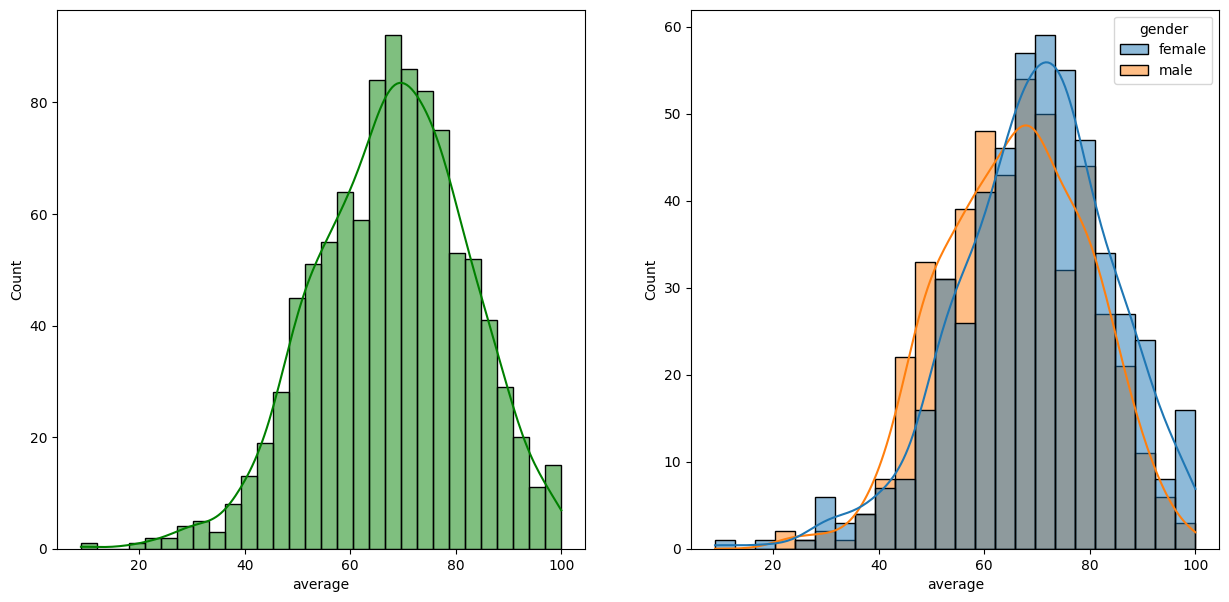

In [16]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde='True', hue='gender')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

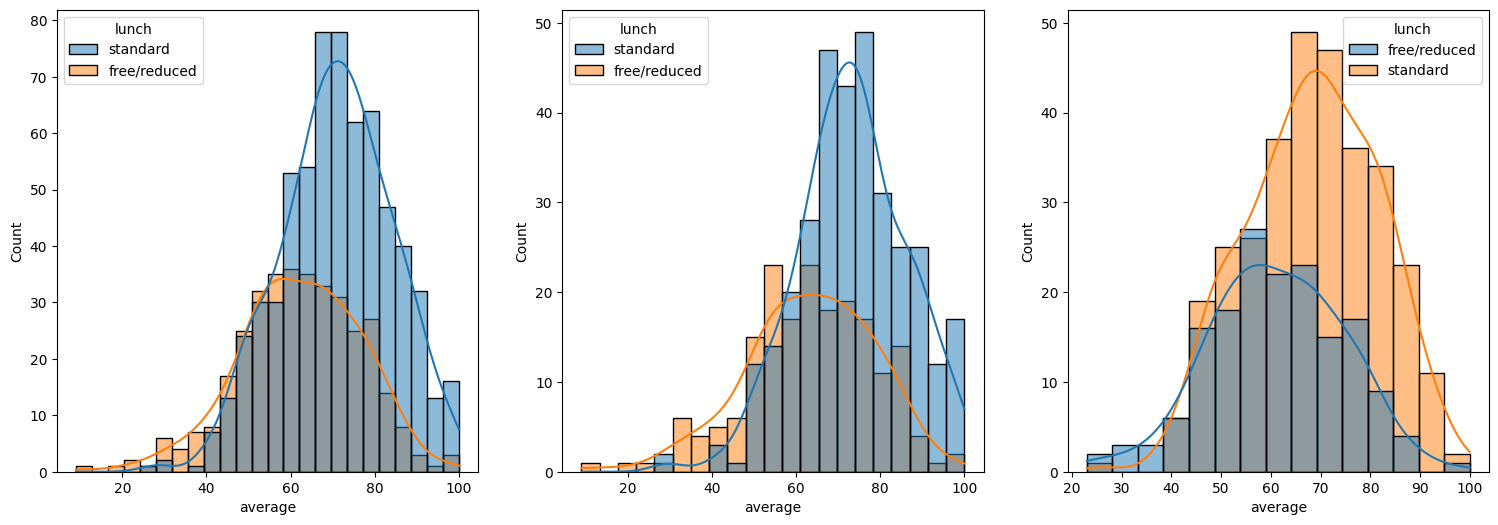

In [17]:
plt.subplots(1,3, figsize = (25,6))
plt.subplot(141)
sns.histplot(data = df, x = 'average', kde = True, hue = 'lunch')
plt.subplot(142)
sns.histplot(data = df[df.gender=='female'], x = 'average', kde = True, hue = 'lunch')
plt.subplot(143)
sns.histplot(data = df[df.gender=='male'], x = 'average', kde = True, hue = 'lunch')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

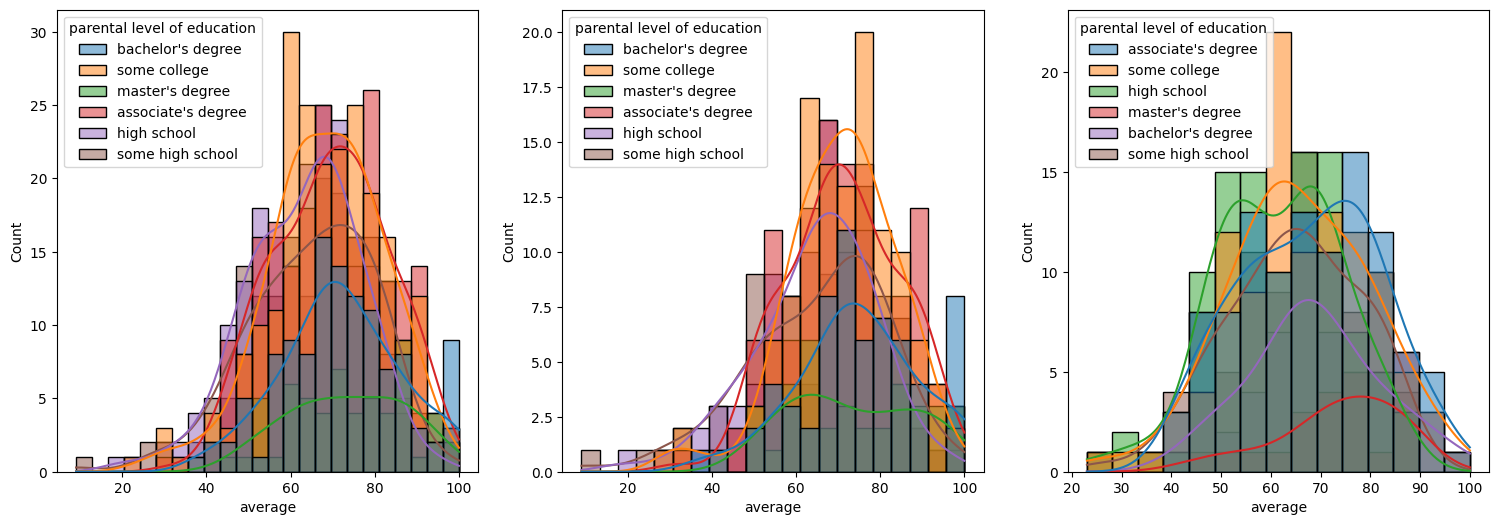

In [18]:
plt.subplots(1,3, figsize = (25,6))
plt.subplot(141)
sns.histplot(data = df, x = 'average', kde = True, hue = 'parental level of education')
plt.subplot(142)
sns.histplot(data = df[df.gender=='female'], x = 'average', kde = True, hue = 'parental level of education')
plt.subplot(143)
sns.histplot(data = df[df.gender=='male'], x = 'average', kde = True, hue = 'parental level of education')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

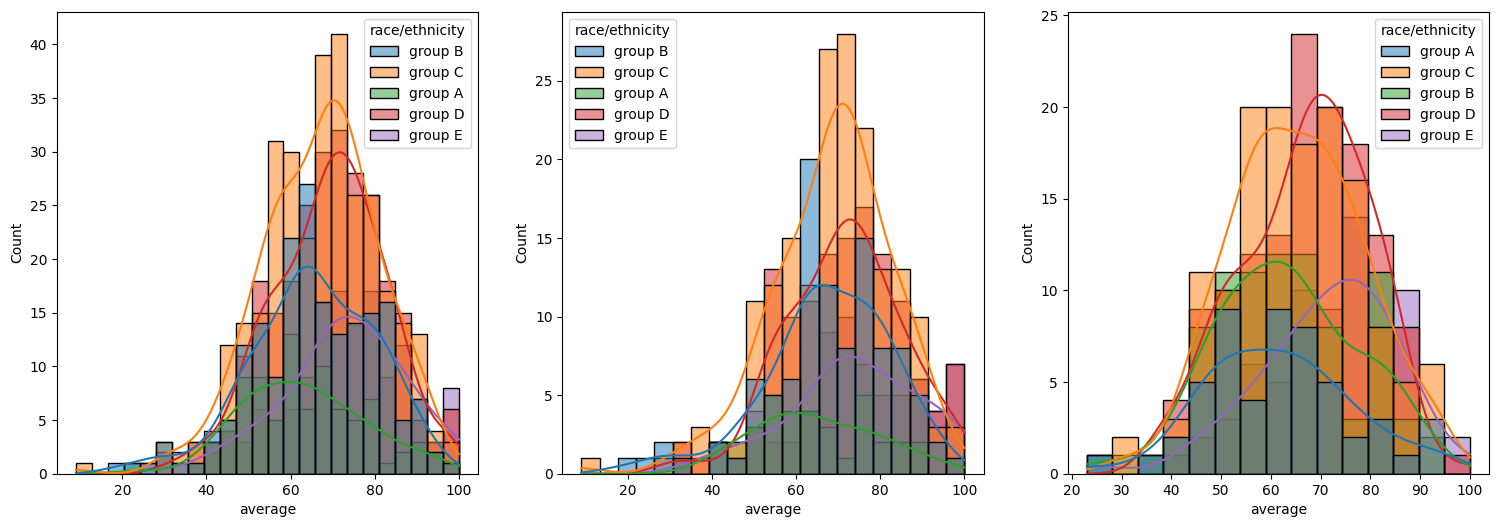

In [19]:
plt.subplots(1,3, figsize = (25,6))
plt.subplot(141)
sns.histplot(data = df, x = 'average', kde = True, hue = 'race/ethnicity')
plt.subplot(142)
sns.histplot(data = df[df.gender=='female'], x = 'average', kde = True, hue = 'race/ethnicity')
plt.subplot(143)
sns.histplot(data = df[df.gender=='male'], x = 'average', kde = True, hue = 'race/ethnicity')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

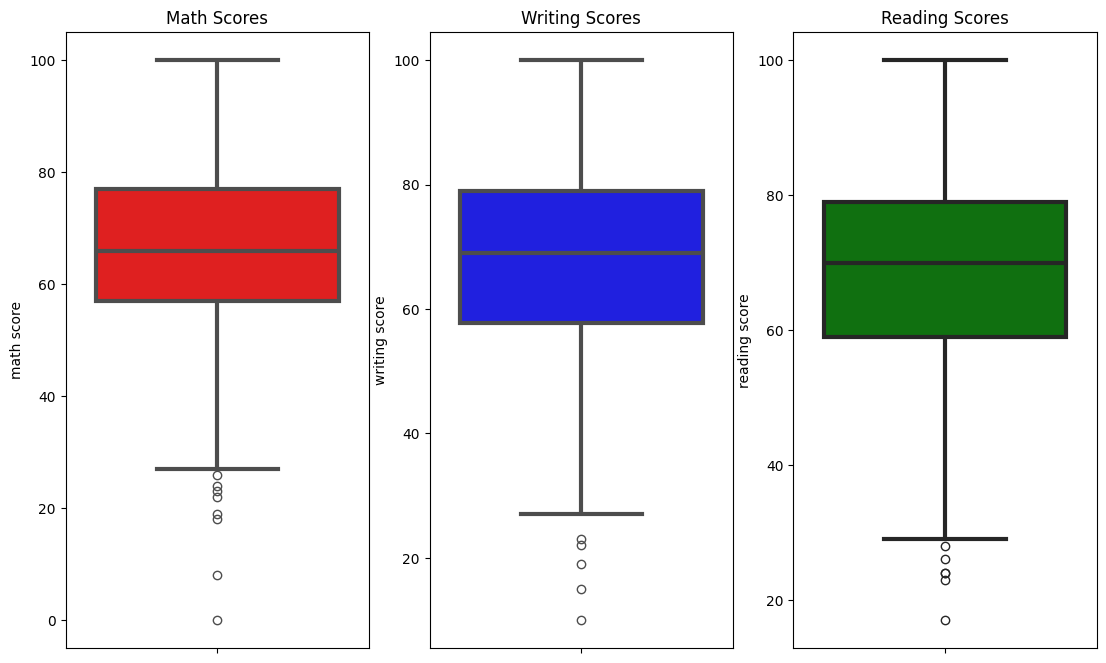

In [20]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Math Scores')
sns.boxplot(y='math score', data = df, color = 'red', linewidth=3)
plt.subplot(1,4,2)
plt.title('Writing Scores')
sns.boxplot(y='writing score', data = df, color = 'blue', linewidth=3)
plt.subplot(1,4,3)
plt.title('Reading Scores')
sns.boxplot(y='reading score', data = df, color = 'green', linewidth=3)
plt.show

(-1.25, 1.25, -1.25, 1.25)

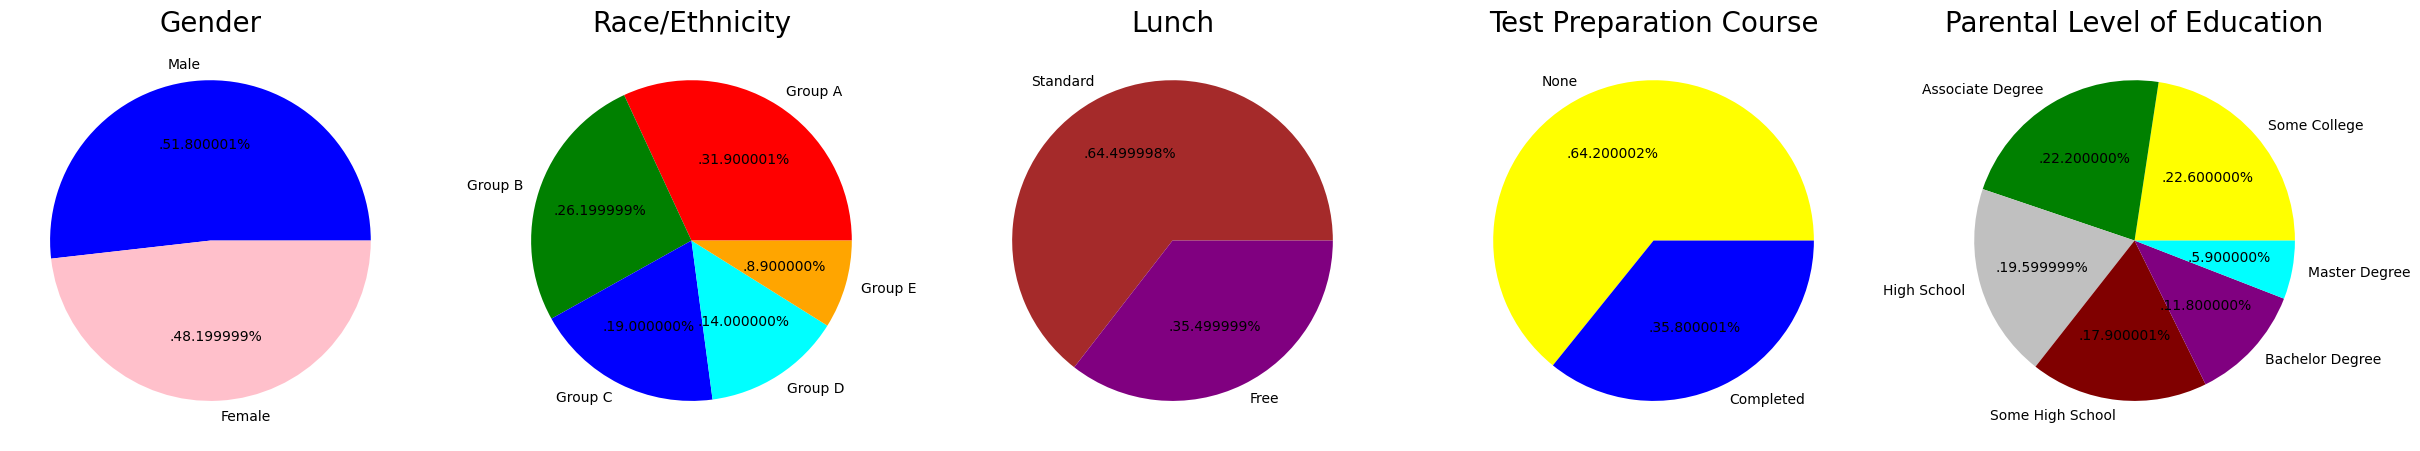

In [21]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Male', 'Female'
color = ['blue', 'pink']
plt.pie(size, colors =color, labels = labels, autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race/ethnicity'].value_counts()
labels = 'Group A', 'Group B', 'Group C', 'Group D', 'Group E'
color = ['red', 'green', 'blue', 'cyan', 'orange']
plt.pie(size, colors =color, labels = labels, autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['brown', 'purple']
plt.pie(size, colors =color, labels = labels, autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['yellow', 'blue']
plt.pie(size, colors =color, labels = labels, autopct = '.%2f%%')
plt.title('Test Preparation Course', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,5)
size = df['parental level of education'].value_counts()
labels = 'Some College', 'Associate Degree', 'High School', 'Some High School', 'Bachelor Degree', 'Master Degree'
color = ['yellow', 'green', 'silver', 'maroon', 'purple', 'cyan']
plt.pie(size, colors =color, labels = labels, autopct = '.%2f%%')
plt.title('Parental Level of Education', fontsize = 20)
plt.axis('off')

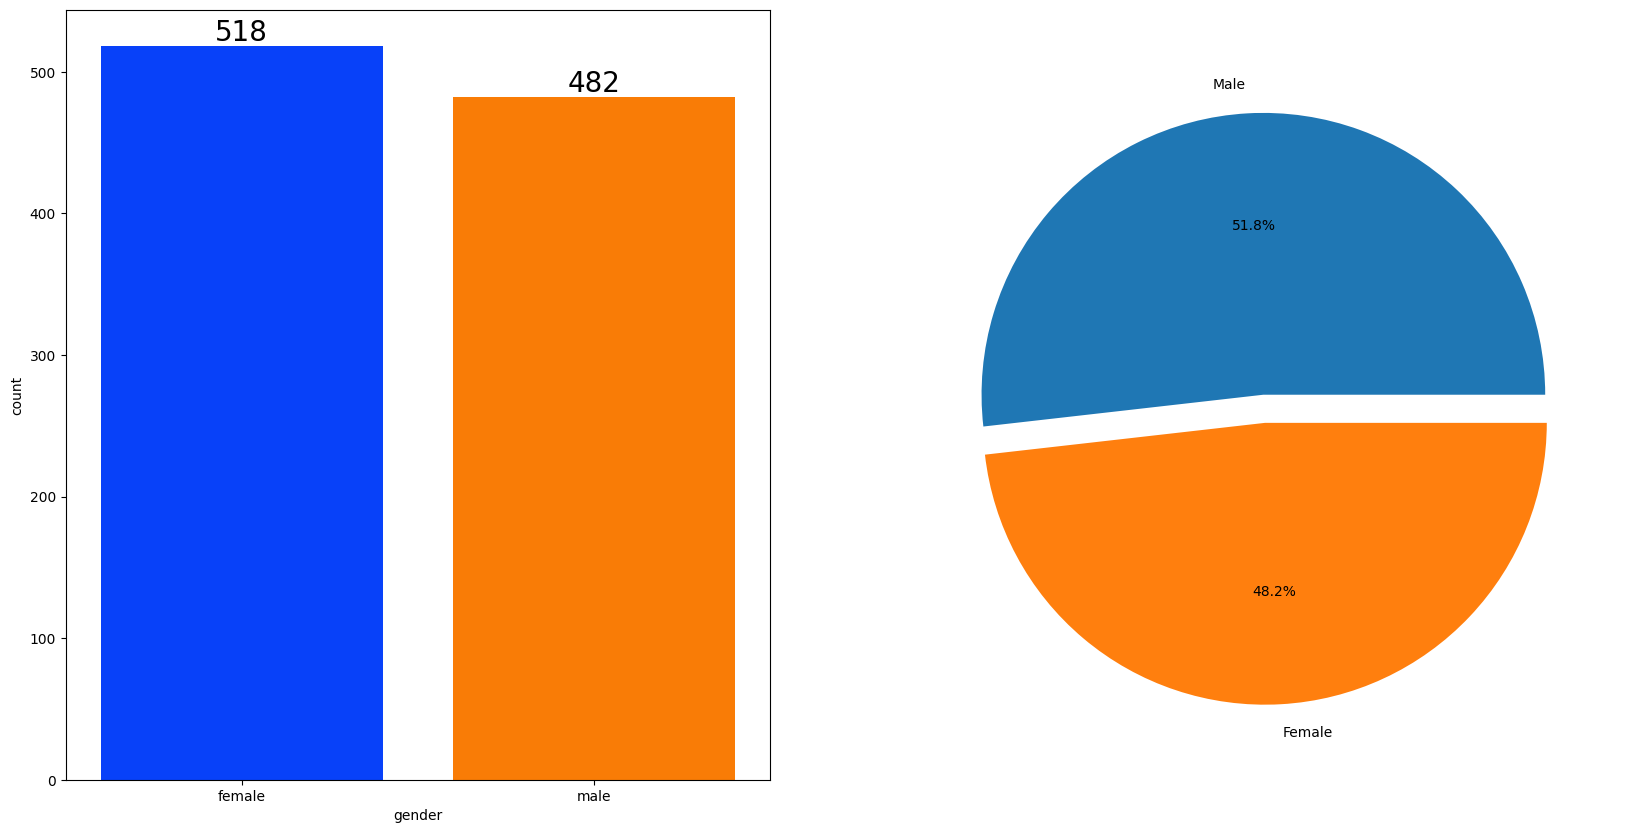

In [22]:
f, ax = plt.subplots(1,2, figsize=(20,10))
sns.countplot(x=df['gender'], data = df, palette = 'bright', ax=ax[0], saturation = 0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 20)

plt.pie (x=df['gender'].value_counts(), labels = ['Male', 'Female'], explode = [0, 0.1], autopct= '%1.1f%%')
plt.show()